In [1]:
# Import
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Parameters

# Number of iterations
n = 30

# Factorized number
num = 975734686214396237

# Max number of CUDA Blocks
max_CUDA_blocks = 1000

# Step use for incrementing the number of CUDA Blocks
step = 50

In [20]:
csv_name = "output"
csv_path = csv_name + ".csv"

In [21]:
CSV = pd.read_csv(csv_path)

In [5]:
# CSV[CSV["num_threads"] == 12].max()

num_threads        12
iteration          30
execution_time    206
dtype: int64

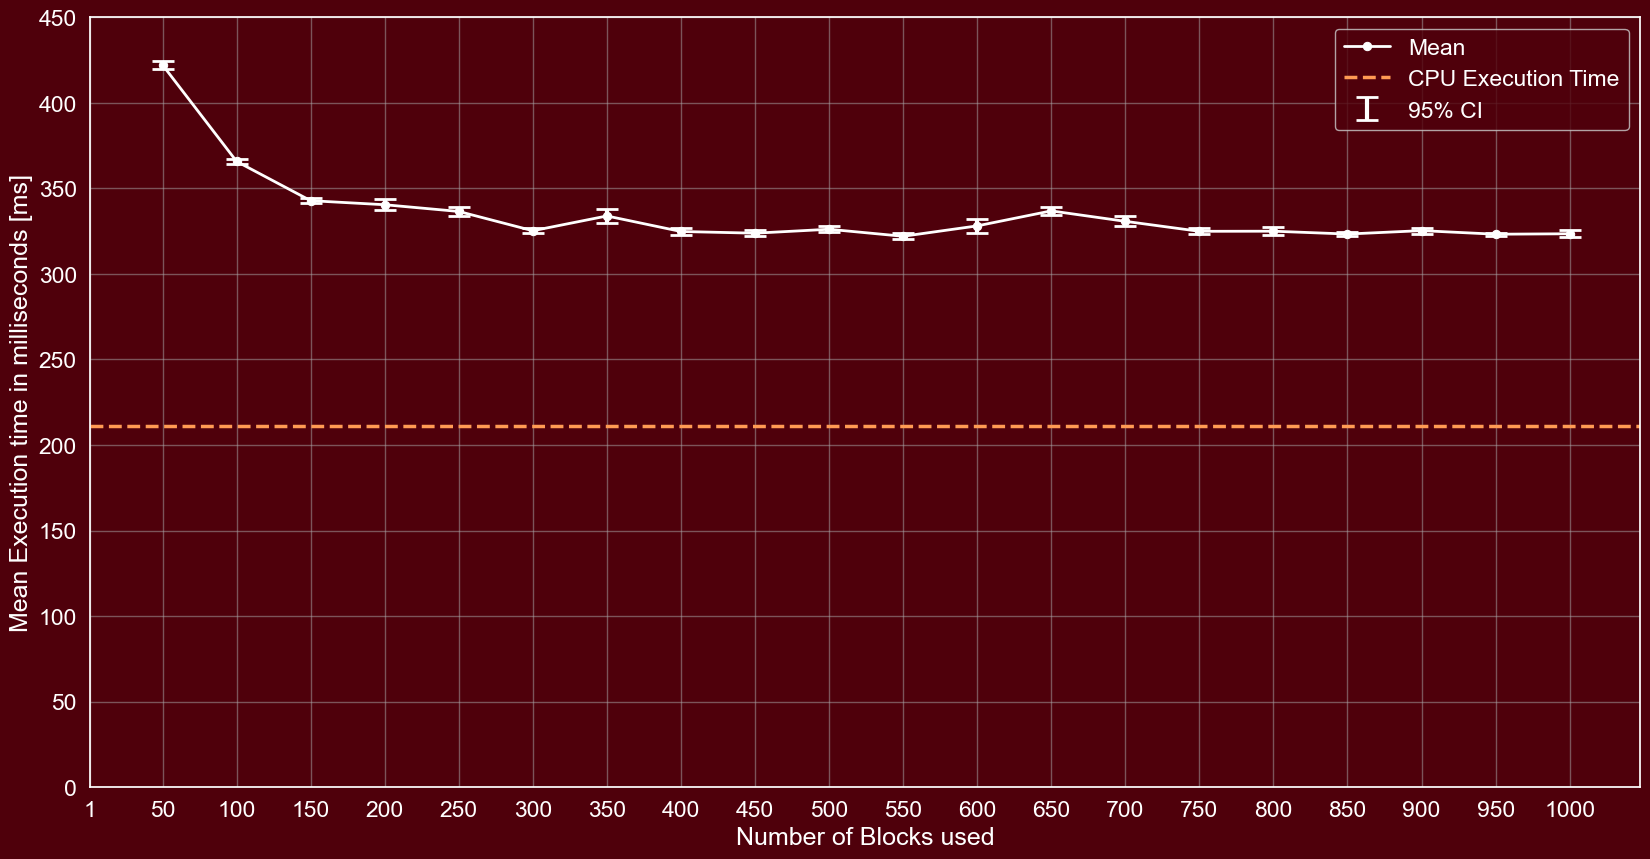

In [43]:
red_backgroud = True

execution_time = "TOTAL" # or "GPU"
execution_time = execution_time + "_execution_time"

if red_backgroud:
    sns.set_theme(rc={'axes.facecolor':'#4F000B', 'figure.facecolor':'#4F000B'}, font_scale=1.5)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': 'white',
                        'axes.labelcolor': 'white',
                        'xtick.color': 'white',
                        'ytick.color': 'white',
                        'axes.titlecolor': 'white'})
    plt.grid(color='darkgray', alpha=0.5) 
    line_color = 'white'
    line_width = 2
else:
    sns.set_theme(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=1.5)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': '#4F000B',
                        'axes.labelcolor': '#4F000B',
                        'xtick.color': '#4F000B',
                        'ytick.color': '#4F000B',
                        'axes.titlecolor': '#4F000B'})
    plt.grid(color='#4F000B', alpha=0.3) 
    plt.gca().spines['bottom'].set_color('#4F000B') 
    plt.gca().spines['left'].set_color('#4F000B') 
    plt.gca().spines['right'].set_color('#4F000B') 
    plt.gca().spines['top'].set_color('#4F000B') 
    line_color = '#4F000B'
    line_width = 2

y_V = []

ci = []

CUDA_blocks_ticks = sorted(CSV['num_CUDA_blocks'].unique())

for blocks in range(step, max_CUDA_blocks+1, step):

    y_V.append(CSV[CSV["num_CUDA_blocks"] == blocks][execution_time].mean())
    ci.append(1.96 * (CSV[CSV["num_CUDA_blocks"] == blocks][execution_time].std() / math.sqrt(n)))


plt.errorbar(x=range(step, max_CUDA_blocks+1, step), y=y_V, fmt='o', yerr=ci, markersize=1, capsize=8, label="95% CI", color=line_color, lw=3, capthick=2)

sns.lineplot(x=range(step, max_CUDA_blocks+1, step), y=y_V, marker='o', label="Mean", color=line_color, linewidth=line_width)
    
# Plot horizontal line at 211 ms (CPU execution time)
plt.axhline(y=211, color='#FF9B54', linestyle='--', label="CPU Execution Time", lw=2.5)

plt.xlabel('Number of Blocks used')
plt.ylabel('Mean Execution time in milliseconds [ms]')

plt.ylim(0, 450)

plt.xticks(CUDA_blocks_ticks)

plt.legend()
plt.show()

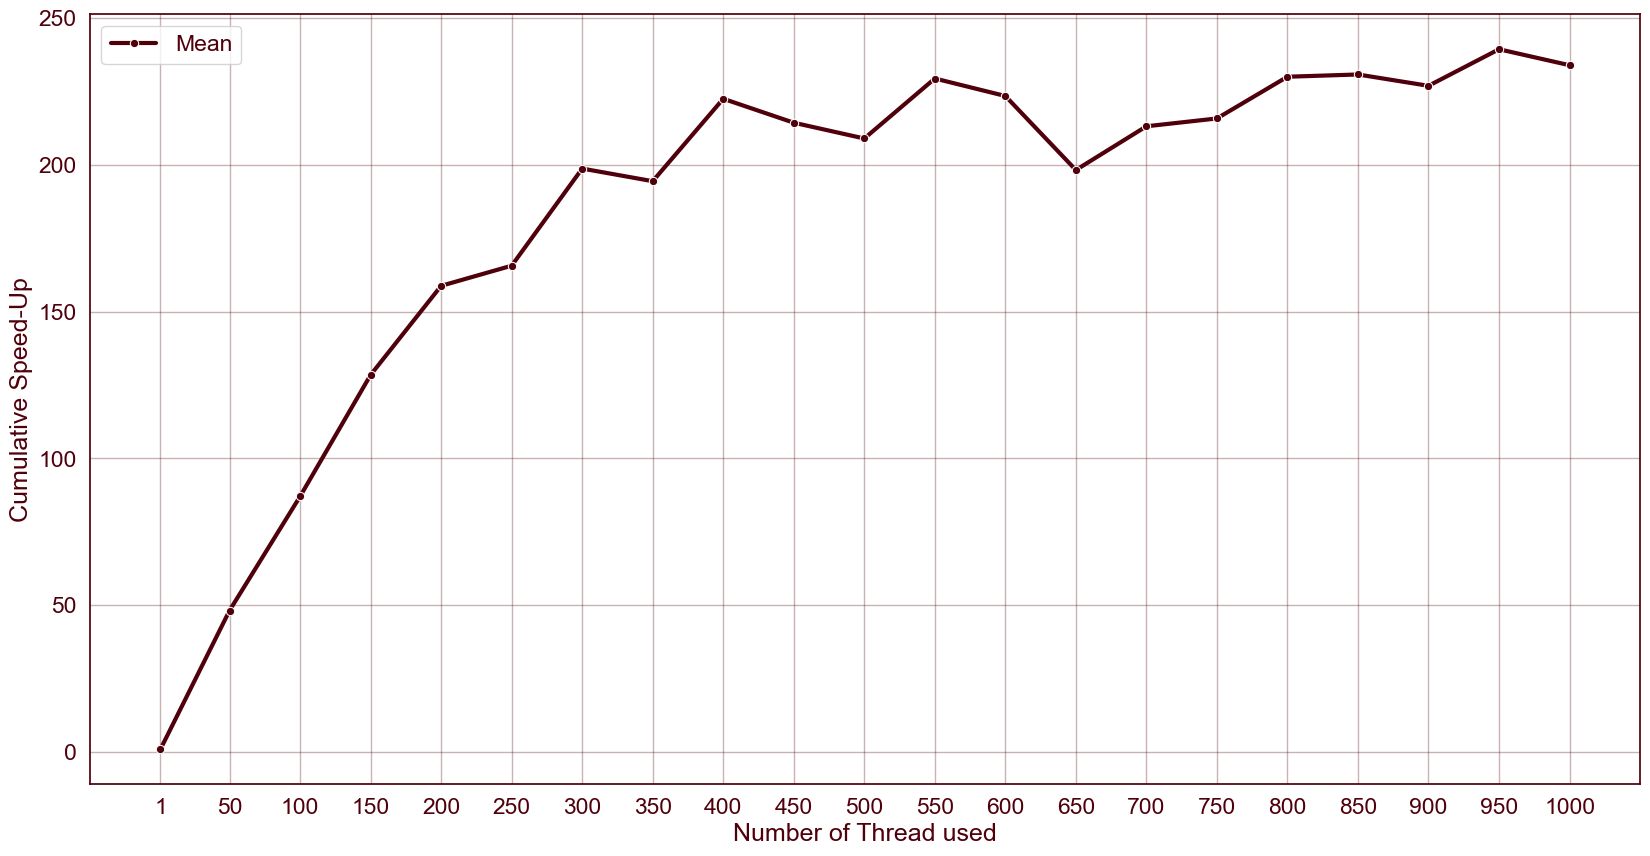

In [44]:
# Cumulative Speedup
red_backgroud = False

execution_time = "GPU" # "GPU" or "TOTAL"
execution_time = execution_time + "_execution_time"

if red_backgroud:
    sns.set_theme(rc={'axes.facecolor':'#4F000B', 'figure.facecolor':'#4F000B'}, font_scale=1.5)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': 'white',
                        'axes.labelcolor': 'white',
                        'xtick.color': 'white',
                        'ytick.color': 'white',
                        'axes.titlecolor': 'white'})
    plt.grid(color='darkgray', alpha=0.5) 
    line_color = 'white'
    line_width = 2.5
else:
    sns.set_theme(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=1.5)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': '#4F000B',
                        'axes.labelcolor': '#4F000B',
                        'xtick.color': '#4F000B',
                        'ytick.color': '#4F000B',
                        'axes.titlecolor': '#4F000B'})
    plt.grid(color='#4F000B', alpha=0.3) 
    plt.gca().spines['bottom'].set_color('#4F000B') 
    plt.gca().spines['left'].set_color('#4F000B') 
    plt.gca().spines['right'].set_color('#4F000B') 
    plt.gca().spines['top'].set_color('#4F000B') 
    line_color = '#4F000B'
    line_width = 3

y_V = []

ci = []

CUDA_blocks_ticks = sorted(CSV['num_CUDA_blocks'].unique())

for block in CUDA_blocks_ticks:

    y_V.append(CSV[CSV["num_CUDA_blocks"] == 1][execution_time].mean() / CSV[CSV["num_CUDA_blocks"] == block][execution_time].mean())
    ci.append(1.96 * ((CSV[CSV["num_CUDA_blocks"] == 1][execution_time] / CSV[CSV["num_CUDA_blocks"] == block][execution_time].reset_index(drop=True)).std() / math.sqrt(n)))


# plt.errorbar(x=CUDA_blocks_ticks, y=y_V, fmt='o', yerr=ci, markersize=1, capsize=8, color=line_color, label="95% CI", lw=3, capthick=2)

sns.lineplot(x=CUDA_blocks_ticks, y=y_V, marker='o', label="Mean", color=line_color, linewidth=line_width)
    
plt.xlabel('Number of Thread used')
plt.ylabel('Cumulative Speed-Up')

plt.xticks(CUDA_blocks_ticks)


plt.legend()
plt.show()